In [6]:
## Linear Regression using normal equation

import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [7]:
## np.c_ : Translates slice objects to concatenation along the second axis.

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.110694  ],
       [2.80263863]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.110694  ],
       [9.71597126]])

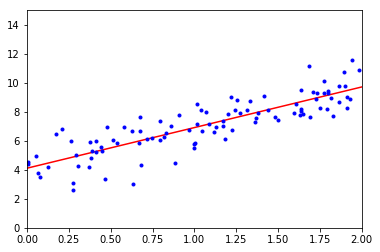

In [10]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
### Gradient Descent Review

##1. Batch gradient descent
## it uses the whole batch of training data at every step.

eta = 0.02
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.10989553],
       [2.80327914]])

In [13]:
X_b

array([[1.        , 1.74799653],
       [1.        , 1.44070571],
       [1.        , 0.88714353],
       [1.        , 0.79407695],
       [1.        , 0.67158421],
       [1.        , 0.41179685],
       [1.        , 0.12390748],
       [1.        , 1.36589851],
       [1.        , 0.2751318 ],
       [1.        , 0.37260056],
       [1.        , 1.19841508],
       [1.        , 0.51425865],
       [1.        , 0.99789719],
       [1.        , 0.46453328],
       [1.        , 0.68121686],
       [1.        , 1.6399974 ],
       [1.        , 0.79406412],
       [1.        , 0.67679953],
       [1.        , 0.0754696 ],
       [1.        , 1.91007747],
       [1.        , 0.99966342],
       [1.        , 1.18217322],
       [1.        , 0.86168094],
       [1.        , 0.63036846],
       [1.        , 0.06739434],
       [1.        , 0.81898701],
       [1.        , 1.69379939],
       [1.        , 0.37731325],
       [1.        , 1.16946515],
       [1.        , 0.0082593 ],
       [1.

In [14]:
# stochastic gradient descent 

## simluated annealing

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        


In [15]:
theta

array([[4.10839877],
       [2.81640365]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15313478]), array([2.84973398]))

In [18]:
## Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_features.fit_transform(X)

X_poly[0], X[0]
## adding the square of the first feature as the second feature

(array([-1.82346734,  3.32503314]), array([-1.82346734]))

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07798153]), array([[0.99281449, 0.48447312]]))

In [20]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val") 



In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)

In [22]:
from sklearn.pipeline import Pipeline 
polynomial_regression = Pipeline(
    (("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
     ("sgd_reg", LinearRegression()))) 
plot_learning_curves(polynomial_regression, X, y) 

In [23]:
# Ridge Regression: linear regression with l2-norm
# Lasso Regression: Linear regression with l1-norm

sgd_clf = SGDRegressor(penalty="l2")

In [24]:
## early-stopping
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
# warnings.filterwarnings("ignore", category=DataConversionWarning)

from sklearn.base import clone

sgd_reg  = SGDRegressor(n_iter = 1, warm_start = True, penalty = "l1", learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

for epoch in range(1000):
    sgd_reg.fit(X_train, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)



In [25]:

from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

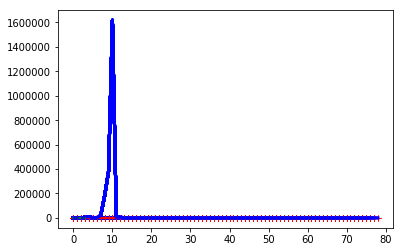

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [ ]:
# the Softmax Regression model
# first computes a score s k (x) for each class k, then estimates the probability of each
# class by applying the softmax function (also called the normalized exponential) to the
# scores

